In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from glob import glob
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
warnings.filterwarnings('ignore')
os.chdir('../../../hw2')

### Helper Functions

In [2]:
def load_run_metric(logdir_name, iterations=1):

    # source: https://tbparse.readthedocs.io/en/latest/pages/raw.html#event-accumulator
    data_path = os.path.join(os.getcwd(), 'data')
    logdir = os.path.join(data_path, logdir_name)
    logfile = os.path.join(logdir, 'events*')
    logfile = glob(logfile)[0]
    metrics = {}
    
    event_acc = EventAccumulator(logfile)
    event_acc.Reload()

    if iterations == 1:
        for metric in event_acc.Tags()['scalars']:
            metrics[metric] = event_acc.Scalars(metric)[0].value
    else:
        for iter in np.arange(iterations):
            metrics[iter] = {}

            if iter == 0:
                for metric in event_acc.Tags()['scalars']:
                    metrics[iter][metric] = event_acc.Scalars(metric)[iter].value
            else:
                for metric in event_acc.Tags()['scalars'][:-1]:
                    metrics[iter][metric] = event_acc.Scalars(metric)[iter].value
                
    return metrics

## 3. Policy Gradients

### 3.2 Experiment 1 (CartPole)
Note: All parameters used in the experiments were unchanged from the default commands provided in the hw2 PDF.

In [7]:
# small batch experiments

cartpole_metrics = load_run_metric('q2_pg_cartpole_CartPole-v0_23-09-2023_20-07-14', iterations=100)
cartpole_rtg_metrics = load_run_metric('q2_pg_cartpole_rtg_CartPole-v0_23-09-2023_22-03-00', iterations=100)
cartpole_na_metrics = load_run_metric('q2_pg_cartpole_na_CartPole-v0_24-09-2023_01-58-33', iterations=100)
cartpole_rtg_na_metrics = load_run_metric('q2_pg_cartpole_rtg_na_CartPole-v0_24-09-2023_01-59-31', iterations=100)

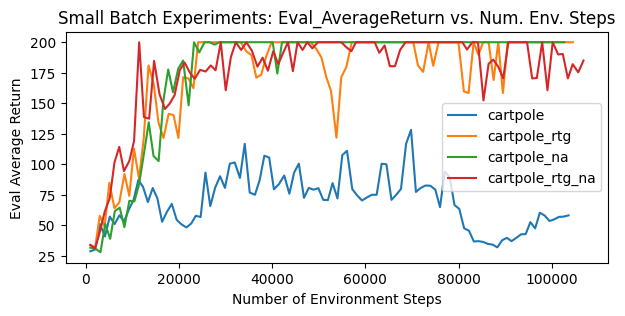

In [8]:
# plot
iterations = np.arange(100)
cartpole_metrics_steps = [cartpole_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_metrics_avg_return = [cartpole_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_metrics_rtg_steps = [cartpole_rtg_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_metrics_rtg_avg_return = [cartpole_rtg_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_metrics_na_steps = [cartpole_na_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_metrics_na_avg_return = [cartpole_na_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_metrics_rtg_na_steps = [cartpole_rtg_na_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_metrics_rtg_na_avg_return = [cartpole_rtg_na_metrics[i]['Eval_AverageReturn'] for i in iterations]

plt.figure(figsize=(7, 3))
plt.plot(cartpole_metrics_steps, cartpole_metrics_avg_return, label='cartpole')
plt.plot(cartpole_metrics_rtg_steps, cartpole_metrics_rtg_avg_return, label='cartpole_rtg')
plt.plot(cartpole_metrics_na_steps, cartpole_metrics_na_avg_return, label='cartpole_na')
plt.plot(cartpole_metrics_rtg_na_steps, cartpole_metrics_rtg_na_avg_return, label='cartpole_rtg_na')

plt.title('Small Batch Experiments: Eval_AverageReturn vs. Num. Env. Steps')
plt.xlabel('Number of Environment Steps')
plt.ylabel('Eval Average Return')
plt.legend()
plt.show()

In [22]:
# large batch experiments

cartpole_lb_metrics = load_run_metric('q2_pg_cartpole_lb_CartPole-v0_23-09-2023_23-49-22', iterations=100)
cartpole_lb_rtg_metrics = load_run_metric('q2_pg_cartpole_lb_rtg_CartPole-v0_23-09-2023_23-51-45', iterations=100)
cartpole_lb_na_metrics = load_run_metric('q2_pg_cartpole_lb_na_CartPole-v0_24-09-2023_02-00-12', iterations=100)
cartpole_lb_rtg_na_metrics = load_run_metric('q2_pg_cartpole_lb_rtg_na_CartPole-v0_24-09-2023_02-02-12', iterations=100)

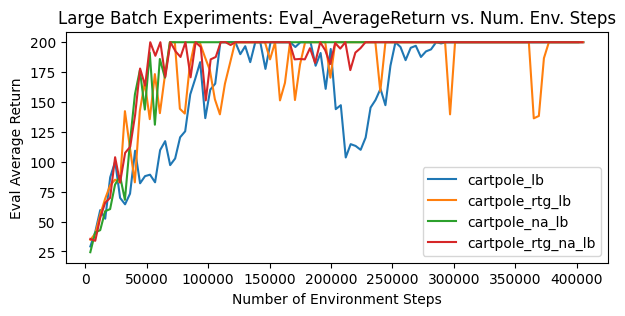

In [23]:
# plot

cartpole_lb_metrics_steps = [cartpole_lb_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_lb_metrics_avg_return = [cartpole_lb_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_lb_metrics_rtg_steps = [cartpole_lb_rtg_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_lb_metrics_rtg_avg_return = [cartpole_lb_rtg_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_lb_metrics_na_steps = [cartpole_lb_na_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_lb_metrics_na_avg_return = [cartpole_lb_na_metrics[i]['Eval_AverageReturn'] for i in iterations]
cartpole_lb_metrics_rtg_na_steps = [cartpole_lb_rtg_na_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cartpole_lb_metrics_rtg_na_avg_return = [cartpole_lb_rtg_na_metrics[i]['Eval_AverageReturn'] for i in iterations]

plt.figure(figsize=(7, 3))
plt.plot(cartpole_lb_metrics_steps, cartpole_lb_metrics_avg_return, label='cartpole_lb')
plt.plot(cartpole_lb_metrics_rtg_steps, cartpole_lb_metrics_rtg_avg_return, label='cartpole_rtg_lb')
plt.plot(cartpole_lb_metrics_na_steps, cartpole_lb_metrics_na_avg_return, label='cartpole_na_lb')
plt.plot(cartpole_lb_metrics_rtg_na_steps, cartpole_lb_metrics_rtg_na_avg_return, label='cartpole_rtg_na_lb')

plt.title('Large Batch Experiments: Eval_AverageReturn vs. Num. Env. Steps')
plt.xlabel('Number of Environment Steps')
plt.ylabel('Eval Average Return')
plt.legend()
plt.show()

## 4. Using a Neural Network Baseline

### 4.2 Experiment 2 (HalfCheetah)

For the last deliverable, I decreased the number of baseline gradient steps from 5 to 1.

In [11]:
# load results

cheetah_metrics = load_run_metric('q2_pg_cheetah_HalfCheetah-v4_24-09-2023_02-16-04', iterations=100)
cheetah_baseline_metrics = load_run_metric('q2_pg_cheetah_baseline_HalfCheetah-v4_24-09-2023_03-08-28', iterations=100)
cheetah_baseline_bgs1_metrics = load_run_metric('q2_pg_cheetah_baseline_bgs1_HalfCheetah-v4_24-09-2023_03-31-49', iterations=100)

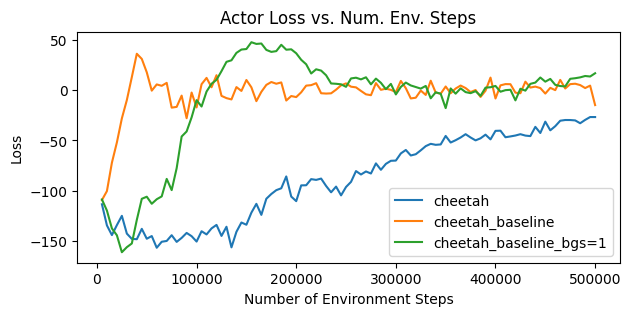

In [12]:
# plot: baseline loss

cheetah_loss = [cheetah_metrics[i]['Actor_Loss'] for i in iterations]
cheetah_steps = [cheetah_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cheetah_baseline_loss = [cheetah_baseline_metrics[i]['Actor_Loss'] for i in iterations]
cheetah_baseline_steps = [cheetah_baseline_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]
cheetah_baseline_bgs1_loss = [cheetah_baseline_bgs1_metrics[i]['Actor_Loss'] for i in iterations]
cheetah_baseline_bgs1_steps = [cheetah_baseline_bgs1_metrics[i]['Train_EnvstepsSoFar'] for i in iterations]

plt.figure(figsize=(7, 3))
plt.plot(cheetah_steps, cheetah_loss, label='cheetah')
plt.plot(cheetah_baseline_steps, cheetah_baseline_loss, label='cheetah_baseline')
plt.plot(cheetah_baseline_bgs1_steps, cheetah_baseline_bgs1_loss, label='cheetah_baseline_bgs=1')

plt.title('Actor Loss vs. Num. Env. Steps')
plt.xlabel('Number of Environment Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

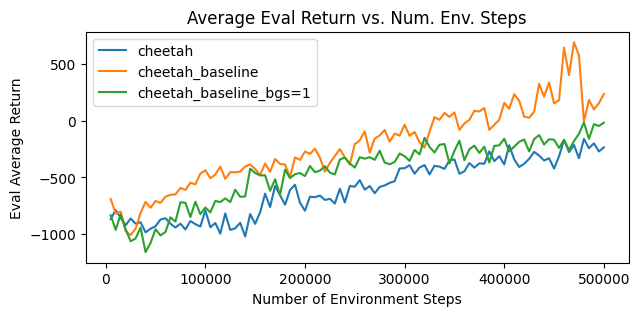

In [13]:
# plot: average eval return

cheetah_avg_eval = [cheetah_metrics[i]['Eval_AverageReturn'] for i in iterations]
cheetah_baseline_avg_eval = [cheetah_baseline_metrics[i]['Eval_AverageReturn'] for i in iterations]
cheetah_baseline_bgs1_avg_eval = [cheetah_baseline_bgs1_metrics[i]['Eval_AverageReturn'] for i in iterations]

plt.figure(figsize=(7, 3))
plt.plot(cheetah_steps, cheetah_avg_eval, label='cheetah')
plt.plot(cheetah_baseline_steps, cheetah_baseline_avg_eval, label='cheetah_baseline')
plt.plot(cheetah_baseline_bgs1_steps, cheetah_baseline_bgs1_avg_eval, label='cheetah_baseline_bgs=1')

plt.title('Average Eval Return vs. Num. Env. Steps')
plt.xlabel('Number of Environment Steps')
plt.ylabel('Eval Average Return')
plt.legend()
plt.show()

## 5. Implementing Generalized Advantage Estimation

### Experiment 3 (LunarLander-v2)

In [30]:
# launching search in the notebook

for gae_lambda in [0, 0.95, 0.98, 0.99, 1]:
    exp3_command = f"\
        python cs285/scripts/run_hw2.py \
        --env_name LunarLander-v2 --ep_len 1000 \
        --discount 0.99 -n 300 -l 3 -s 128 -b 2000 -lr 0.001 \
        --use_reward_to_go --use_baseline --gae_lambda {gae_lambda} \
        --exp_name lunar_lander_lambda{gae_lambda}\
        "
    os.system(exp3_command)

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_lunar_lander_lambda0_LunarLander-v2_24-09-2023_13-15-08
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : -151.8890380859375
Eval_StdReturn : 51.642478942871094
Eval_MaxReturn : -92.12568664550781
Eval_MinReturn : -227.28346252441406
Eval_AverageEpLen : 81.4
Train_AverageReturn : -190.1705780029297
Train_StdReturn : 121.03303527832031


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)


Train_MaxReturn : -58.820926666259766
Train_MinReturn : -492.5400695800781
Train_AverageEpLen : 85.875
Actor Loss : -3.097654104232788
Baseline Loss : 14568.2265625
Train_EnvstepsSoFar : 2061
TimeSinceStart : 1.1771471500396729
Initial_DataCollection_AverageReturn : -190.1705780029297
Done logging...



********** Iteration 1 ************

Eval_AverageReturn : -91.41685485839844
Eval_StdReturn : 82.83269500732422
Eval_MaxReturn : 25.16455078125
Eval_MinReturn : -182.1793975830078
Eval_AverageEpLen : 102.25
Train_AverageReturn : -184.35430908203125
Train_StdReturn : 110.38533020019531
Train_MaxReturn : -72.38211059570312
Train_MinReturn : -482.7796325683594
Train_AverageEpLen : 95.72727272727273
Actor Loss : -2.4289188385009766
Baseline Loss : 11662.6943359375
Train_EnvstepsSoFar : 4167
TimeSinceStart : 3.7583820819854736
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : -181.8260955810547
Eval_StdReturn : 83.60199737548828
Eval_MaxReturn : -102.66645050048828

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_lunar_lander_lambda0.95_LunarLander-v2_24-09-2023_13-26-47
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : -131.9931640625
Eval_StdReturn : 86.65870666503906
Eval_MaxReturn : 18.63707733154297
Eval_MinReturn : -278.3583984375
Eval_AverageEpLen : 85.33333333333333
Train_AverageReturn : -158.8011932373047
Train_StdReturn : 100.15203094482422
Train_MaxReturn : 6.340934753417969
Train_MinReturn : -363.88330078125
Train_AverageEpLen : 84.41666666666667
Actor Loss : -40.03449249267578
Baseline Loss : 10188.3681640625
Train_EnvstepsSoFar : 2026
TimeSinceStart : 1.1137759685516357
Initial_DataCollection_AverageReturn : -158.8011932373047
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : -191.09918212890625
Eval_StdReturn : 134.0665283203125
Eval_MaxReturn : -89.62017822265625
Eval_MinReturn : -476.1047668457031
Eval_AverageEpLen : 78.16666666666667
Train_AverageReturn : -134.98345947265625
Train_StdReturn : 59.58856201171875
Train_MaxReturn : -56.93354034423828
Train_MinReturn : -254.9519500732422
Train_AverageEpLen : 85.79166666666667
Actor Loss : -30.332334518432617
Baseline Loss : 5613.0107421875
Train_EnvstepsSoFar : 4085
TimeSinceStart : 2.247929096221924
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : -188.91458129882812
Eval_StdReturn : 93.06370544433594
Eval_MaxReturn : -79.18927001953125
Eval_MinReturn : -343.3199768066406
Eval_AverageEpLen : 101.2
Train_AverageReturn : -190.0700225830078
Train_StdReturn : 109.3077392578125
Train_MaxReturn : -64.9521484375
Train_MinReturn : -435.6138916015625
Train_AverageEpLen : 91.04545454545455
Actor Loss : -40.76434326171875
Baseline Loss : 11512.13671875
Train_EnvstepsSo

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_lunar_lander_lambda0.98_LunarLander-v2_24-09-2023_13-46-45
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : -136.5501708984375
Eval_StdReturn : 42.927833557128906
Eval_MaxReturn : -75.82463836669922
Eval_MinReturn : -191.52655029296875
Eval_AverageEpLen : 92.4
Train_AverageReturn : -171.2103729248047
Train_StdReturn : 93.98171997070312
Train_MaxReturn : 11.839500427246094
Train_MinReturn : -390.6741027832031
Train_AverageEpLen : 85.41666666666667
Actor Loss : -74.60551452636719
Baseline Loss : 10458.61328125
Train_EnvstepsSoFar : 2050
TimeSinceStart : 1.04335618019104
Initial_DataCollection_AverageReturn : -171.2103729248047
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : -135.95895385742188
Eval_StdReturn : 31.1252498626709
Eval_MaxReturn : -94.01433563232422
Eval_MinReturn : -172.51705932617188
Eval_AverageEpLen : 107.75
Train_AverageReturn : -188.56858825683594
Train_StdReturn : 106.26069641113281
Train_MaxReturn : -49.378231048583984
Train_MinReturn : -419.24267578125
Train_AverageEpLen : 91.68181818181819
Actor Loss : -72.07388305664062
Baseline Loss : 11593.8935546875
Train_EnvstepsSoFar : 4067
TimeSinceStart : 2.0520260334014893
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : -144.7154083251953
Eval_StdReturn : 82.20806884765625
Eval_MaxReturn : -72.50053405761719
Eval_MinReturn : -294.97479248046875
Eval_AverageEpLen : 100.2
Train_AverageReturn : -146.70681762695312
Train_StdReturn : 85.71162414550781
Train_MaxReturn : 14.12890625
Train_MinReturn : -331.27276611328125
Train_AverageEpLen : 96.47619047619048
Actor Loss : -50.52185821533203
Baseline Loss : 6579.25244140625
Train_EnvstepsSoFar : 609

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_lunar_lander_lambda0.99_LunarLander-v2_24-09-2023_14-03-20
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : -215.1455535888672
Eval_StdReturn : 122.147216796875
Eval_MaxReturn : -88.028564453125
Eval_MinReturn : -392.4132080078125
Eval_AverageEpLen : 90.8
Train_AverageReturn : -182.61109924316406
Train_StdReturn : 85.63004302978516
Train_MaxReturn : -64.36442565917969
Train_MinReturn : -442.7161560058594
Train_AverageEpLen : 96.38095238095238
Actor Loss : -95.34687042236328
Baseline Loss : 10046.0556640625
Train_EnvstepsSoFar : 2024
TimeSinceStart : 1.1488358974456787
Initial_DataCollection_AverageReturn : -182.61109924316406
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : -156.57066345214844
Eval_StdReturn : 78.81536865234375
Eval_MaxReturn : -91.90127563476562
Eval_MinReturn : -308.5179443359375
Eval_AverageEpLen : 93.8
Train_AverageReturn : -161.74176025390625
Train_StdReturn : 75.85081481933594
Train_MaxReturn : -41.59358215332031
Train_MinReturn : -340.1773376464844
Train_AverageEpLen : 92.72727272727273
Actor Loss : -80.87429809570312
Baseline Loss : 7974.74072265625
Train_EnvstepsSoFar : 4064
TimeSinceStart : 2.219877004623413
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : -131.70230102539062
Eval_StdReturn : 49.27690124511719
Eval_MaxReturn : -62.10552978515625
Eval_MinReturn : -211.7539520263672
Eval_AverageEpLen : 80.8
Train_AverageReturn : -236.69020080566406
Train_StdReturn : 134.0843963623047
Train_MaxReturn : -74.46316528320312
Train_MinReturn : -469.1900634765625
Train_AverageEpLen : 97.42857142857143
Actor Loss : -112.15291595458984
Baseline Loss : 17540.16796875
Train_EnvstepsSoFar : 61

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_lunar_lander_lambda1_LunarLander-v2_24-09-2023_14-17-18
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : -193.78054809570312
Eval_StdReturn : 170.17869567871094
Eval_MaxReturn : -61.29486083984375
Eval_MinReturn : -523.7998046875
Eval_AverageEpLen : 97.8
Train_AverageReturn : -185.90701293945312
Train_StdReturn : 89.88744354248047
Train_MaxReturn : -72.04452514648438
Train_MinReturn : -422.2265625
Train_AverageEpLen : 89.43478260869566
Actor Loss : -139.62664794921875
Baseline Loss : 11555.5380859375
Train_EnvstepsSoFar : 2057
TimeSinceStart : 1.1346802711486816
Initial_DataCollection_AverageReturn : -185.90701293945312
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : -156.38465881347656
Eval_StdReturn : 56.70268630981445
Eval_MaxReturn : -84.57819366455078
Eval_MinReturn : -237.6951904296875
Eval_AverageEpLen : 100.4
Train_AverageReturn : -215.84786987304688
Train_StdReturn : 160.6171112060547
Train_MaxReturn : -18.556541442871094
Train_MinReturn : -686.0255126953125
Train_AverageEpLen : 96.14285714285714
Actor Loss : -157.00515747070312
Baseline Loss : 20142.880859375
Train_EnvstepsSoFar : 4076
TimeSinceStart : 2.1432101726531982
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : -133.89923095703125
Eval_StdReturn : 89.09243774414062
Eval_MaxReturn : -21.414840698242188
Eval_MinReturn : -295.09088134765625
Eval_AverageEpLen : 100.0
Train_AverageReturn : -147.57704162597656
Train_StdReturn : 70.77104949951172
Train_MaxReturn : -10.634197235107422
Train_MinReturn : -283.83935546875
Train_AverageEpLen : 99.9047619047619
Actor Loss : -84.17383575439453
Baseline Loss : 5451.71337890625
Train_EnvstepsSoFar

In [4]:
# load results

lunar_1 = load_run_metric('q2_pg_lunar_lander_lambda0_LunarLander-v2_24-09-2023_13-15-08', iterations=300)
lunar_2 = load_run_metric('q2_pg_lunar_lander_lambda0.95_LunarLander-v2_24-09-2023_13-26-47', iterations=300)
lunar_3 = load_run_metric('q2_pg_lunar_lander_lambda0.98_LunarLander-v2_24-09-2023_13-46-45', iterations=300)
lunar_4 = load_run_metric('q2_pg_lunar_lander_lambda0.99_LunarLander-v2_24-09-2023_14-03-20', iterations=300)
lunar_5 = load_run_metric('q2_pg_lunar_lander_lambda1_LunarLander-v2_24-09-2023_14-17-18', iterations=300)

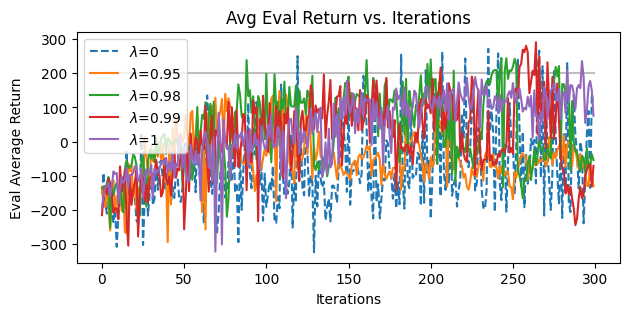

In [5]:
# plot

iterations = np.arange(300)

lunar_1_avg_return = [lunar_1[i]['Eval_AverageReturn'] for i in iterations]
lunar_2_avg_return = [lunar_2[i]['Eval_AverageReturn'] for i in iterations]
lunar_3_avg_return = [lunar_3[i]['Eval_AverageReturn'] for i in iterations]
lunar_4_avg_return = [lunar_4[i]['Eval_AverageReturn'] for i in iterations]
lunar_5_avg_return = [lunar_5[i]['Eval_AverageReturn'] for i in iterations]

plt.figure(figsize=(7, 3))
plt.hlines(xmin=0, xmax=300, y=200, color='grey', alpha=0.5)
plt.plot(iterations, lunar_1_avg_return, label=r'$\lambda$=0', linestyle='dashed')
plt.plot(iterations, lunar_2_avg_return, label=r'$\lambda$=0.95')
plt.plot(iterations, lunar_3_avg_return, label=r'$\lambda$=0.98')
plt.plot(iterations, lunar_4_avg_return, label=r'$\lambda$=0.99')
plt.plot(iterations, lunar_5_avg_return, label=r'$\lambda$=1')
# plt.ylim(-400, 300)

plt.title('Avg Eval Return vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Eval Average Return')
plt.legend()
plt.show()

## 6. Hyperparameters and Sample Efficiency

### Experiment 4 (InvertedPendulum)

Default settings

In [12]:
# default settings

for seed in np.arange(1, 6):
    exp4_command = f"\
        python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
        --exp_name pendulum_default_s{seed} \
        -rtg --use_baseline -na \
        --batch_size 5000 \
        --seed {seed} \
        --gae_lambda 0.98 \
        "
    os.system(exp4_command)

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_default_s0_InvertedPendulum-v4_25-09-2023_18-12-56
########################
Using CPU.

********** Iteration 0 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Eval_AverageReturn : 9.90243911743164
Eval_StdReturn : 4.69979190826416
Eval_MaxReturn : 23.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 9.902439024390244
Train_AverageReturn : 8.605852127075195
Train_StdReturn : 5.0754618644714355
Train_MaxReturn : 58.0
Train_MinReturn : 3.0
Train_AverageEpLen : 8.605851979345955
Actor Loss : -0.05816490575671196
Baseline Loss : 54.84702682495117
Train_EnvstepsSoFar : 5000
TimeSinceStart : 2.235301971435547
Initial_DataCollection_AverageReturn : 8.605852127075195
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 19.047618865966797
Eval_StdReturn : 12.214262008666992
Eval_MaxReturn : 60.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 19.047619047619047
Train_AverageReturn : 11.69859790802002
Train_StdReturn : 7.538703918457031
Train_MaxReturn : 50.0
Train_MinReturn : 3.0
Train_AverageEpLen : 11.698598130841122
Actor Loss : -0.05937856435775757
Baseline Loss : 83.13088989257812
Train_EnvstepsSoFar : 10007
TimeSinceStart : 4.198691129684448
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 19.14285659790039
Eval_StdReturn : 9.809062004089355
Eval_MaxReturn : 46.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 19.142857142857142
Train_AverageReturn : 17.742958068847656
Train_StdReturn : 12.304847717285156
Train_MaxReturn : 79.0
Train_MinReturn : 4.0
Train_AverageEpLen : 17.742957746478872
Actor Loss : -0.0539279468357563
Baseline Loss : 207.6715545654297
Train_EnvstepsSoFar : 15046
TimeSinceStart : 6.108383893966675
Done logging...



********** Iteration 3 **

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_default_s1_InvertedPendulum-v4_25-09-2023_18-16-09
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 11.571428298950195
Eval_StdReturn : 6.170370578765869
Eval_MaxReturn : 32.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 11.571428571428571
Train_AverageReturn : 8.438448905944824
Train_StdReturn : 4.319453716278076
Train_MaxReturn : 29.0
Train_MinReturn : 3.0
Train_AverageEpLen : 8.438448566610456
Actor Loss : -0.06510182470083237
Baseline Loss : 38.450592041015625
Train_EnvstepsSoFar : 5004
TimeSinceStart : 1.8544161319732666
Initial_DataCollection_AverageReturn : 8.438448905944824
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 15.923076629638672
Eval_StdReturn : 8.208453178405762
Eval_MaxReturn : 33.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 15.923076923076923
Train_AverageReturn : 11.755868911743164
Train_StdReturn : 7.1267218589782715
Train_MaxReturn : 56.0
Train_MinReturn : 3.0
Train_AverageEpLen : 11.755868544600938
Actor Loss : -0.050274163484573364
Baseline Loss : 75.72079467773438
Train_EnvstepsSoFar : 10012
TimeSinceStart : 3.6850879192352295
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 26.1875
Eval_StdReturn : 17.198179244995117
Eval_MaxReturn : 69.0
Eval_MinReturn : 7.0
Eval_AverageEpLen : 26.1875
Train_AverageReturn : 18.22909164428711
Train_StdReturn : 10.526601791381836
Train_MaxReturn : 64.0
Train_MinReturn : 4.0
Train_AverageEpLen : 18.22909090909091
Actor Loss : -0.041806161403656006
Baseline Loss : 140.31106567382812
Train_EnvstepsSoFar : 15025
TimeSinceStart : 5.471834182739258
Done logging...



********** Iteration 3 ************

Eval

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_default_s2_InvertedPendulum-v4_25-09-2023_18-19-26
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 10.86486530303955
Eval_StdReturn : 6.456348419189453
Eval_MaxReturn : 28.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 10.864864864864865
Train_AverageReturn : 7.70878267288208
Train_StdReturn : 3.960895299911499
Train_MaxReturn : 32.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.708782742681048
Actor Loss : -0.0536896251142025
Baseline Loss : 32.65922164916992
Train_EnvstepsSoFar : 5003
TimeSinceStart : 1.8675880432128906
Initial_DataCollection_AverageReturn : 7.70878267288208
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 16.79166603088379
Eval_StdReturn : 11.604521751403809
Eval_MaxReturn : 48.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 16.791666666666668
Train_AverageReturn : 11.06637191772461
Train_StdReturn : 6.261274337768555
Train_MaxReturn : 45.0
Train_MinReturn : 3.0
Train_AverageEpLen : 11.06637168141593
Actor Loss : -0.032578110694885254
Baseline Loss : 55.52836227416992
Train_EnvstepsSoFar : 10005
TimeSinceStart : 3.7497940063476562
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 23.33333396911621
Eval_StdReturn : 12.360330581665039
Eval_MaxReturn : 53.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 23.333333333333332
Train_AverageReturn : 15.74294662475586
Train_StdReturn : 8.906853675842285
Train_MaxReturn : 74.0
Train_MinReturn : 4.0
Train_AverageEpLen : 15.74294670846395
Actor Loss : -0.04469604045152664
Baseline Loss : 105.92013549804688
Train_EnvstepsSoFar : 15027
TimeSinceStart : 5.593364000320435
Done logging...



********** Iteration 3 **

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_default_s3_InvertedPendulum-v4_25-09-2023_18-22-40
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 10.945945739746094
Eval_StdReturn : 5.708911418914795
Eval_MaxReturn : 27.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 10.945945945945946
Train_AverageReturn : 7.638167858123779
Train_StdReturn : 3.845339298248291
Train_MaxReturn : 25.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.638167938931297
Actor Loss : -0.0511431060731411
Baseline Loss : 30.450279235839844
Train_EnvstepsSoFar : 5003
TimeSinceStart : 1.9468460083007812
Initial_DataCollection_AverageReturn : 7.638167858123779
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 16.75
Eval_StdReturn : 12.268692970275879
Eval_MaxReturn : 49.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 16.75
Train_AverageReturn : 10.713062286376953
Train_StdReturn : 6.095167636871338
Train_MaxReturn : 33.0
Train_MinReturn : 3.0
Train_AverageEpLen : 10.713062098501071
Actor Loss : -0.041037723422050476
Baseline Loss : 49.20365524291992
Train_EnvstepsSoFar : 10006
TimeSinceStart : 3.8839199542999268
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 20.600000381469727
Eval_StdReturn : 12.342609405517578
Eval_MaxReturn : 47.0
Eval_MinReturn : 6.0
Eval_AverageEpLen : 20.6
Train_AverageReturn : 15.327217102050781
Train_StdReturn : 10.050634384155273
Train_MaxReturn : 59.0
Train_MinReturn : 3.0
Train_AverageEpLen : 15.327217125382264
Actor Loss : -0.06428307294845581
Baseline Loss : 120.8735122680664
Train_EnvstepsSoFar : 15018
TimeSinceStart : 5.774040699005127
Done logging...



********** Iteration 3 ************

Eval_AverageReturn : 4

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_default_s4_InvertedPendulum-v4_25-09-2023_18-25-59
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 8.95555591583252
Eval_StdReturn : 5.485153675079346
Eval_MaxReturn : 30.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 8.955555555555556
Train_AverageReturn : 7.38200569152832
Train_StdReturn : 3.774245262145996
Train_MaxReturn : 30.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.382005899705015
Actor Loss : -0.04771799594163895
Baseline Loss : 29.265138626098633
Train_EnvstepsSoFar : 5005
TimeSinceStart : 2.312459945678711
Initial_DataCollection_AverageReturn : 7.38200569152832
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 12.21212100982666
Eval_StdReturn : 6.284938812255859
Eval_MaxReturn : 27.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 12.212121212121213
Train_AverageReturn : 9.699612617492676
Train_StdReturn : 5.433965682983398
Train_MaxReturn : 37.0
Train_MinReturn : 3.0
Train_AverageEpLen : 9.699612403100776
Actor Loss : -0.05247802659869194
Baseline Loss : 38.4319953918457
Train_EnvstepsSoFar : 10010
TimeSinceStart : 4.253842830657959
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 17.0
Eval_StdReturn : 9.71253490447998
Eval_MaxReturn : 39.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 17.0
Train_AverageReturn : 14.011173248291016
Train_StdReturn : 8.721314430236816
Train_MaxReturn : 59.0
Train_MinReturn : 3.0
Train_AverageEpLen : 14.011173184357542
Actor Loss : -0.04083884879946709
Baseline Loss : 87.11652374267578
Train_EnvstepsSoFar : 15026
TimeSinceStart : 6.15920615196228
Done logging...



********** Iteration 3 ************

Eval_AverageReturn : 

In [3]:
# load results

pendulum_default_1 = load_run_metric('q2_pg_pendulum_default_s1_InvertedPendulum-v4_24-09-2023_16-07-43', iterations=100)
pendulum_default_2 = load_run_metric('q2_pg_pendulum_default_s2_InvertedPendulum-v4_24-09-2023_16-11-36', iterations=100)
pendulum_default_3 = load_run_metric('q2_pg_pendulum_default_s3_InvertedPendulum-v4_24-09-2023_16-14-59', iterations=100)
pendulum_default_4 = load_run_metric('q2_pg_pendulum_default_s4_InvertedPendulum-v4_24-09-2023_16-18-19', iterations=100)
pendulum_default_5 = load_run_metric('q2_pg_pendulum_default_s5_InvertedPendulum-v4_24-09-2023_16-21-44', iterations=100)

In [11]:
# average over seeds

iterations = np.arange(100)
runs = [
    pendulum_default_1, pendulum_default_2, pendulum_default_3, pendulum_default_4, pendulum_default_5
]

default_avg_return = []
interp_env_steps = np.arange(0, 500000, 100)

for run in runs:
    default_avg_return.append(
        np.interp(
            interp_env_steps, 
            np.array([run[i]['Train_EnvstepsSoFar'] for i in iterations]),
            np.array([run[i]['Eval_AverageReturn'] for i in iterations]),
        )
    )

default_avg_return = np.mean(np.array(default_avg_return), axis=0)

Tuning

In [3]:
# hyperparameters

for seed in np.arange(1, 6):
    if seed == 1:
        pass
    else:
        exp4_command = f"\
            python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
            --exp_name pendulum_s{seed} \
            -rtg --use_baseline -na \
            --batch_size 7000 \
            --learning_rate 7e-3 \
            --seed {seed} \
            "
        os.system(exp4_command)

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_s2_InvertedPendulum-v4_24-09-2023_16-52-06
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 11.800000190734863
Eval_StdReturn : 7.95989990234375
Eval_MaxReturn : 41.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 11.8
Train_AverageReturn : 7.711453914642334
Train_StdReturn : 4.346805095672607
Train_MaxReturn : 45.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.711453744493392
Actor Loss : -0.04064439237117767
Baseline Loss : 38.91804885864258
Train_EnvstepsSoFar : 7002
TimeSinceStart : 2.8965060710906982
Initial_DataCollection_AverageReturn : 7.711453914642334
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 23.647058486938477
Eval_StdReturn : 10.813614845275879
Eval_MaxReturn : 47.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 23.647058823529413
Train_AverageReturn : 13.172932624816895
Train_StdReturn : 8.146230697631836
Train_MaxReturn : 67.0
Train_MinReturn : 3.0
Train_AverageEpLen : 13.172932330827068
Actor Loss : -0.04723884165287018
Baseline Loss : 99.9049301147461
Train_EnvstepsSoFar : 14010
TimeSinceStart : 5.660981893539429
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 32.0
Eval_StdReturn : 27.63498306274414
Eval_MaxReturn : 123.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 32.0
Train_AverageReturn : 18.98918914794922
Train_StdReturn : 10.946794509887695
Train_MaxReturn : 86.0
Train_MinReturn : 4.0
Train_AverageEpLen : 18.98918918918919
Actor Loss : -0.043579306453466415
Baseline Loss : 168.00628662109375
Train_EnvstepsSoFar : 21036
TimeSinceStart : 8.373750925064087
Done logging...



********** Iteration 3 ************

Eval_Average

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_s3_InvertedPendulum-v4_24-09-2023_16-56-33
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 10.0
Eval_StdReturn : 5.366562843322754
Eval_MaxReturn : 30.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 10.0
Train_AverageReturn : 7.512875556945801
Train_StdReturn : 3.8620035648345947
Train_MaxReturn : 27.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.512875536480687
Actor Loss : -0.05941197648644447
Baseline Loss : 30.57028579711914
Train_EnvstepsSoFar : 7002
TimeSinceStart : 2.8406310081481934
Initial_DataCollection_AverageReturn : 7.512875556945801
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 17.826086044311523
Eval_StdReturn : 12.142817497253418
Eval_MaxReturn : 46.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 17.82608695652174
Train_AverageReturn : 11.504104614257812
Train_StdReturn : 7.0289387702941895
Train_MaxReturn : 54.0
Train_MinReturn : 3.0
Train_AverageEpLen : 11.504105090311986
Actor Loss : -0.04892044514417648
Baseline Loss : 72.18518829345703
Train_EnvstepsSoFar : 14008
TimeSinceStart : 5.579916954040527
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 31.230770111083984
Eval_StdReturn : 15.778046607971191
Eval_MaxReturn : 69.0
Eval_MinReturn : 14.0
Eval_AverageEpLen : 31.23076923076923
Train_AverageReturn : 20.002849578857422
Train_StdReturn : 12.234298706054688
Train_MaxReturn : 72.0
Train_MinReturn : 4.0
Train_AverageEpLen : 20.002849002849004
Actor Loss : -0.044939588755369186
Baseline Loss : 200.00897216796875
Train_EnvstepsSoFar : 21029
TimeSinceStart : 8.242962837219238
Done logging...



********** Iteratio

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_s4_InvertedPendulum-v4_24-09-2023_17-00-50
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 11.571428298950195
Eval_StdReturn : 6.565214157104492
Eval_MaxReturn : 31.0
Eval_MinReturn : 4.0
Eval_AverageEpLen : 11.571428571428571
Train_AverageReturn : 7.848654747009277
Train_StdReturn : 4.422294616699219
Train_MaxReturn : 41.0
Train_MinReturn : 3.0
Train_AverageEpLen : 7.848654708520179
Actor Loss : -0.04790494218468666
Baseline Loss : 39.833709716796875
Train_EnvstepsSoFar : 7001
TimeSinceStart : 2.4981508255004883
Initial_DataCollection_AverageReturn : 7.848654747009277
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 19.18181800842285
Eval_StdReturn : 10.482176780700684
Eval_MaxReturn : 47.0
Eval_MinReturn : 7.0
Eval_AverageEpLen : 19.181818181818183
Train_AverageReturn : 10.72588062286377
Train_StdReturn : 6.274469375610352
Train_MaxReturn : 43.0
Train_MinReturn : 3.0
Train_AverageEpLen : 10.725880551301685
Actor Loss : -0.04916783422231674
Baseline Loss : 53.66025924682617
Train_EnvstepsSoFar : 14005
TimeSinceStart : 5.140710830688477
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 22.27777862548828
Eval_StdReturn : 11.80303955078125
Eval_MaxReturn : 60.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 22.27777777777778
Train_AverageReturn : 16.140552520751953
Train_StdReturn : 9.628158569335938
Train_MaxReturn : 69.0
Train_MinReturn : 3.0
Train_AverageEpLen : 16.140552995391705
Actor Loss : -0.044531241059303284
Baseline Loss : 117.48623657226562
Train_EnvstepsSoFar : 21010
TimeSinceStart : 7.535826921463013
Done logging...



********** Iteration 3 **

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from ge

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw2/cs285/scripts/../../data/q2_pg_pendulum_s5_InvertedPendulum-v4_24-09-2023_17-05-02
########################
Using CPU.

********** Iteration 0 ************

Eval_AverageReturn : 11.852941513061523
Eval_StdReturn : 8.004161834716797
Eval_MaxReturn : 42.0
Eval_MinReturn : 3.0
Eval_AverageEpLen : 11.852941176470589
Train_AverageReturn : 8.648148536682129
Train_StdReturn : 4.811345100402832
Train_MaxReturn : 34.0
Train_MinReturn : 3.0
Train_AverageEpLen : 8.648148148148149
Actor Loss : -0.05662737786769867
Baseline Loss : 44.304962158203125
Train_EnvstepsSoFar : 7005
TimeSinceStart : 2.6896581649780273
Initial_DataCollection_AverageReturn : 8.648148536682129
Done logging...



********** Iteration 1 ************


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.10/site-packages/tensorboardX/summary.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar = float(scalar)



Eval_AverageReturn : 20.450000762939453
Eval_StdReturn : 12.047718048095703
Eval_MaxReturn : 50.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 20.45
Train_AverageReturn : 13.539499282836914
Train_StdReturn : 9.393243789672852
Train_MaxReturn : 88.0
Train_MinReturn : 3.0
Train_AverageEpLen : 13.539499036608863
Actor Loss : -0.03041764162480831
Baseline Loss : 139.26168823242188
Train_EnvstepsSoFar : 14032
TimeSinceStart : 5.082332134246826
Done logging...



********** Iteration 2 ************

Eval_AverageReturn : 33.07692337036133
Eval_StdReturn : 18.273399353027344
Eval_MaxReturn : 70.0
Eval_MinReturn : 11.0
Eval_AverageEpLen : 33.07692307692308
Train_AverageReturn : 18.488126754760742
Train_StdReturn : 11.828890800476074
Train_MaxReturn : 85.0
Train_MinReturn : 3.0
Train_AverageEpLen : 18.488126649076516
Actor Loss : -0.035873062908649445
Baseline Loss : 186.07513427734375
Train_EnvstepsSoFar : 21039
TimeSinceStart : 7.444828033447266
Done logging...



********** Iteration 3 *********

In [4]:
# load results

pendulum_hyper_1 = load_run_metric('q2_pg_pendulum_s1_InvertedPendulum-v4_24-09-2023_16-38-39', iterations=100)
pendulum_hyper_2 = load_run_metric('q2_pg_pendulum_s2_InvertedPendulum-v4_24-09-2023_16-52-06', iterations=100)
pendulum_hyper_3 = load_run_metric('q2_pg_pendulum_s3_InvertedPendulum-v4_24-09-2023_16-56-33', iterations=100)
pendulum_hyper_4 = load_run_metric('q2_pg_pendulum_s4_InvertedPendulum-v4_24-09-2023_17-00-50', iterations=100)
pendulum_hyper_5 = load_run_metric('q2_pg_pendulum_s5_InvertedPendulum-v4_24-09-2023_17-05-02', iterations=100)

In [13]:
# load results

pendulum_hyper_1 = load_run_metric('q2_pg_pendulum_s1_InvertedPendulum-v4_25-09-2023_18-12-56', iterations=100)
pendulum_hyper_2 = load_run_metric('q2_pg_pendulum_s2_InvertedPendulum-v4_25-09-2023_18-16-09', iterations=100)
pendulum_hyper_3 = load_run_metric('q2_pg_pendulum_s3_InvertedPendulum-v4_25-09-2023_18-19-26', iterations=100)
pendulum_hyper_4 = load_run_metric('q2_pg_pendulum_s4_InvertedPendulum-v4_25-09-2023_18-22-40', iterations=100)
pendulum_hyper_5 = load_run_metric('q2_pg_pendulum_s5_InvertedPendulum-v4_25-09-2023_18-25-59', iterations=100)

In [14]:
# average over seeds

runs = [
    pendulum_hyper_1, pendulum_hyper_2, pendulum_hyper_3, pendulum_hyper_4, pendulum_hyper_5
]

hyper_avg_return = []

for run in runs:
    hyper_avg_return.append(
        np.interp(
            interp_env_steps, 
            np.array([run[i]['Train_EnvstepsSoFar'] for i in iterations]),
            np.array([run[i]['Eval_AverageReturn'] for i in iterations]),
        )
    )

hyper_avg_return = np.mean(np.array(hyper_avg_return), axis=0)

In [20]:
# avg steps took to first reach max score of 1000: default, tuned
interp_env_steps[np.argmax(default_avg_return)], interp_env_steps[np.argmax(hyper_avg_return)]

(354800, 328500)

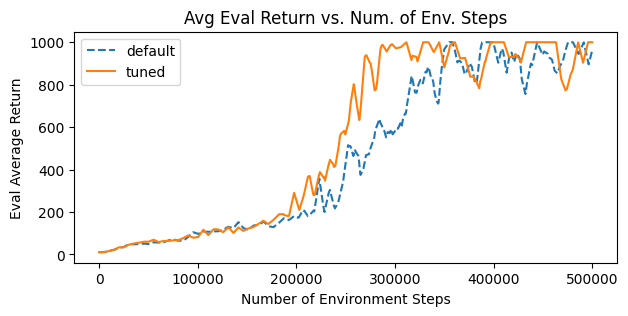

In [16]:
plt.figure(figsize=(7, 3))
plt.hlines(xmin=0, xmax=100, y=1000, color='grey', alpha=0.5)
plt.plot(interp_env_steps, default_avg_return, label=r'default', linestyle='dashed')
plt.plot(interp_env_steps, hyper_avg_return, label=r'tuned')

plt.title('Avg Eval Return vs. Num. of Env. Steps')
plt.xlabel('Number of Environment Steps')
plt.ylabel('Eval Average Return')
plt.legend()
plt.show()